In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 1. Get Data

In [185]:
textFile =  open('movies.txt','r')
movies = textFile.read()
textFile.close()
data = pd.read_csv('movies.txt',sep=None ,header = 0, keep_default_na=True)
movie = pd.DataFrame(data)

# 2. Dealing with Missing Value

In [186]:
# Missing Value counter column wise:
def missvalcount(df):
    count = 0
    cols = df.columns
    for col in cols:
        print(col +'==> ' + str(sum(df[col].isnull())))
        count += sum(df[col].isnull())
    print('\n')
    print('Total missing Value: ', str(count))
    
    # Missing Value Check, Visually
    plt.figure(figsize=(14,4))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

color==> 19
director_name==> 104
num_critic_for_reviews==> 50
duration==> 15
director_facebook_likes==> 104
actor_3_facebook_likes==> 23
actor_2_name==> 13
actor_1_facebook_likes==> 7
gross==> 884
genres==> 0
actor_1_name==> 7
movie_title==> 0
num_voted_users==> 0
cast_total_facebook_likes==> 0
actor_3_name==> 23
facenumber_in_poster==> 13
plot_keywords==> 153
movie_imdb_link==> 0
num_user_for_reviews==> 21
language==> 12
country==> 5
content_rating==> 303
budget==> 492
title_year==> 108
actor_2_facebook_likes==> 13
imdb_score==> 0
aspect_ratio==> 329
movie_facebook_likes==> 0


Total missing Value:  2698


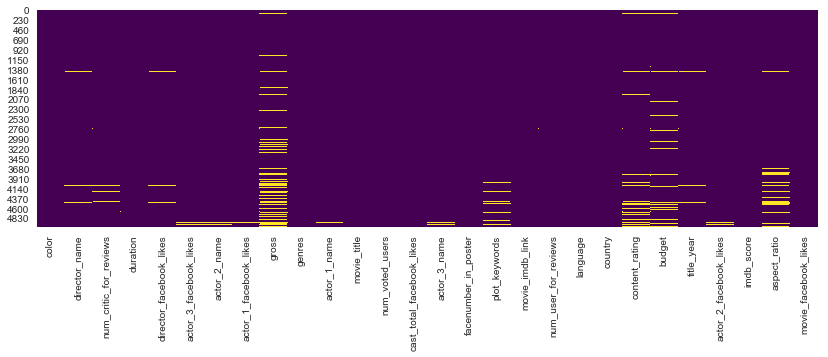

In [5]:
missvalcount(movie) # missing value report for original data

color==> 0
director_name==> 0
num_critic_for_reviews==> 0
duration==> 0
director_facebook_likes==> 0
actor_3_facebook_likes==> 0
actor_2_name==> 0
actor_1_facebook_likes==> 0
gross==> 0
genres==> 0
actor_1_name==> 0
movie_title==> 0
num_voted_users==> 0
cast_total_facebook_likes==> 0
actor_3_name==> 0
facenumber_in_poster==> 0
plot_keywords==> 0
movie_imdb_link==> 0
num_user_for_reviews==> 0
language==> 0
country==> 0
content_rating==> 0
budget==> 0
title_year==> 0
actor_2_facebook_likes==> 0
imdb_score==> 0
aspect_ratio==> 0
movie_facebook_likes==> 0


Total missing Value:  0


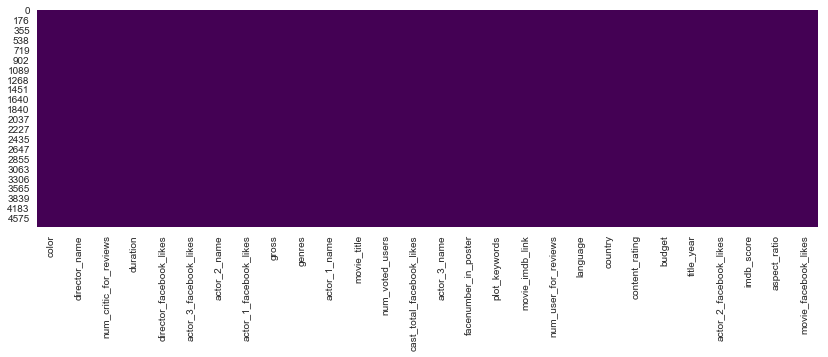

In [187]:
# Dropping all missing value and check visually
movieclean = movie.dropna()
missvalcount(movieclean)

# 3. EDA

In [7]:
movieclean.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [8]:
movieclean.groupby('color')['imdb_score'].mean()
# Averaging rating for color type movies is lower thatn black and white. it is because of number of records.

color
 Black and White    7.137903
Color               6.442318
Name: imdb_score, dtype: float64

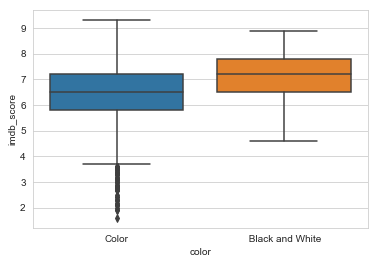

In [9]:
sns.boxplot(x='color', y = 'imdb_score', data=movieclean )
# there are some outliers in rating on color type movies but these numbers may be reasonable because people might not like
# them. Or we could have more data to verify.

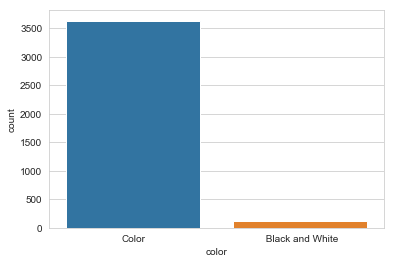

In [10]:
sns.countplot(movieclean['color'])
# Our data set contains more color movie than Black and White

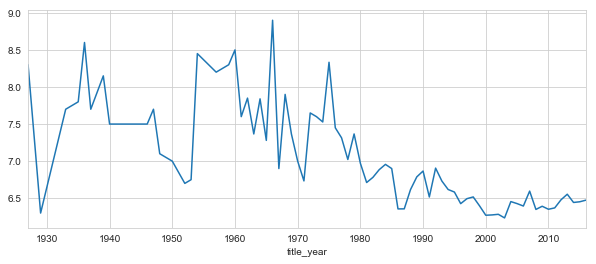

In [11]:
plt.figure(figsize=(10,4))
movieclean.groupby('title_year')['imdb_score'].mean().plot(kind='line')
# it shows year from (1955-1980)'s movie has high avg rating. It shows people still likes old movies may be they have great stories
# rather than more animation and artificials.

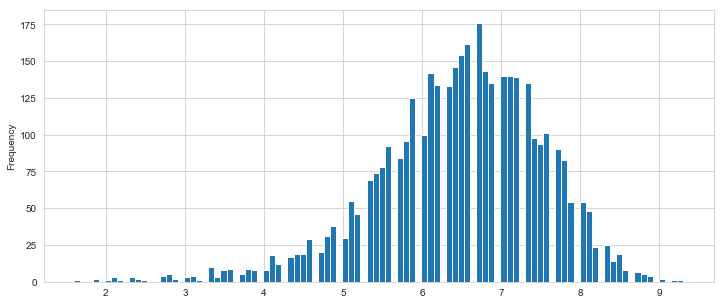

In [12]:
plt.figure(figsize=(12,5))
movieclean['imdb_score'].plot(kind='hist', bins = 100)
# looks like more rating are in between 6 to 8.
# there are few ratings below 2 and above 9. may be they are the worst and best movie respectively. lets look which movie are they

In [13]:
movieclean[(movieclean['imdb_score'] > 9 ) | (movieclean['imdb_score'] <= 2)][['title_year', 'movie_title','imdb_score', 'color']].sort_values('imdb_score')
# We can see that Top 4 are very low ratings  and "The Godfather" and "The Shawshank Redemption" has high ratings and both 
# of the movie are before 2000. Color is not a factor to distinguished a movies rating. Depends on story

,title_year,movie_title,imdb_score,color
2834,2011.0,Justin Bieber: Never Say Never,1.6,Color
2268,2008.0,Disaster Movie,1.9,Color
2295,2004.0,Superbabies: Baby Geniuses 2,1.9,Color
3505,2007.0,Who's Your Caddy?,2.0,Color
3466,1972.0,The Godfather,9.2,Color
1937,1994.0,The Shawshank Redemption,9.3,Color


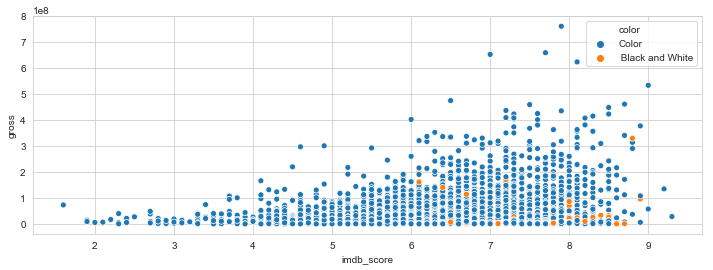

In [14]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='imdb_score', y = 'gross', data=movieclean, hue='color')
# imdb score are more left skewed. there are certain movie of black and white which have more score and avg gross

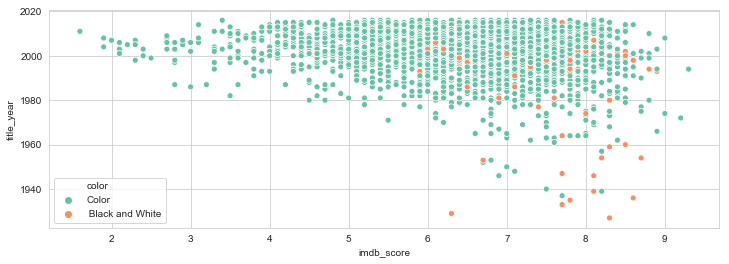

In [15]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='imdb_score', y = 'title_year', data=movieclean, hue='color', palette='Set2')
# nowadays movies produce in color, but still there are black and white movies which are pretty good than todays color movie

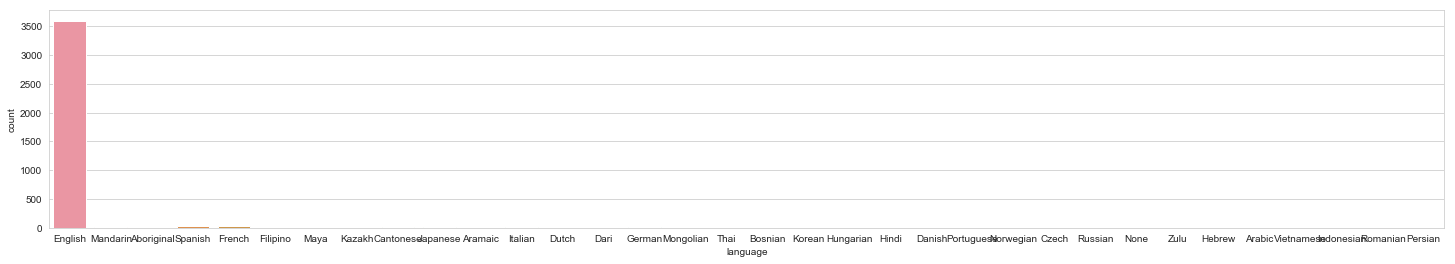

In [16]:
plt.figure(figsize=(25,4))
sns.countplot('language', data=movieclean)
# we can see almost 3550 movies are of english language, some of them are spanish, french and others

In [17]:
# lets explore the directors and actors of movies
movieclean.groupby('actor_1_name')['actor_1_facebook_likes'].mean().sort_values(ascending= False).head()
# These are the top 5 actor 1 who have highest facebook likes

actor_1_name
Darcy Donavan      640000.0
Matthew Ziff       260000.0
Krista Allen       164000.0
Andrew Fiscella    137000.0
Jimmy Bennett       87000.0
Name: actor_1_facebook_likes, dtype: float64

In [18]:
# Lets how much avg score Darcy Donavan movies got
movieclean[movieclean['actor_1_name'] == 'Darcy Donavan'][['color','title_year', 'movie_title', 'imdb_score']]

# It was the "Anchorman: The legend of Ron Burgundy". Imdb Score is pretty good so people like this actor more in facebook

,color,title_year,movie_title,imdb_score
1902,Color,2004.0,Anchorman: The Legend of Ron Burgundy,7.2


In [19]:
# lets see director ' JAMES Cameron' who is very famous in hollywood in production and direction sector.
movieclean[movieclean['director_name'] == 'James Cameron'][
    ['title_year','movie_title', 'imdb_score']]

# we can see All the movies of James Cameron are above 7.2. Rating Depends on director, Actors, genre

,title_year,movie_title,imdb_score
0,2009.0,Avatar,7.9
26,1997.0,Titanic,7.7
288,1991.0,Terminator 2: Judgment Day,8.5
291,1994.0,True Lies,7.2
606,1989.0,The Abyss,7.6
2486,1986.0,Aliens,8.4
3575,1984.0,The Terminator,8.1


In [ ]:
# Corr Plot
plt.figure(figsize=(12,10))
sns.heatmap(movieclean.corr(), annot =  True)

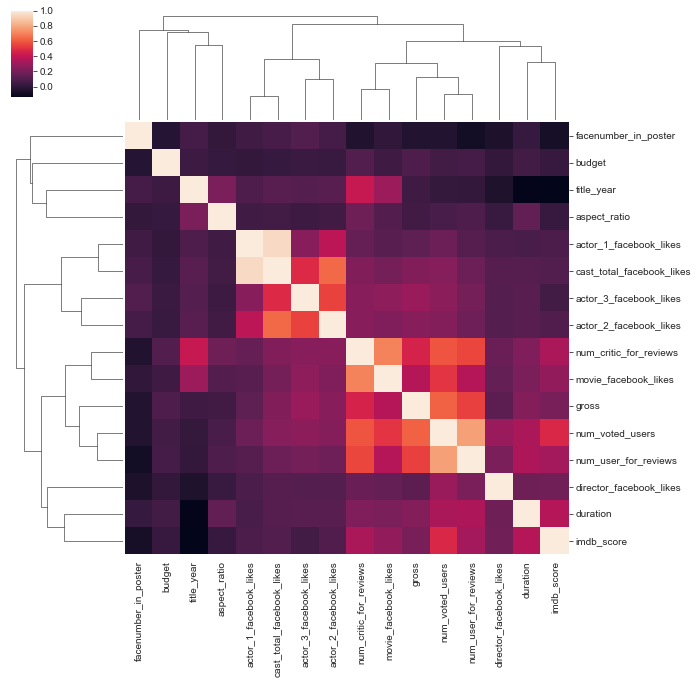

In [20]:
sns.clustermap(movieclean.corr())

# From the cluster map we can see that "IMDB _ SCORE" is more dependable on GROSS, Num_critic_for_reviews, Num_user_for_reviews
# Num_voted_users, Movie_facebook_likes and a little on Director. And IMDB_SCORE less depend on facebook likes of Actors.

In [188]:
# As we can see we have irrelevant columns we dont need for prediction. we could drop them. We saw color, actors name, 
# director has less dependency on targt variable. Hence we are going to drop those columns.
categoricalColumns = ['color', 'director_name','actor_2_name','genres', 'actor_1_name','movie_title','actor_3_name',
                      'plot_keywords','movie_imdb_link','language', 'country','content_rating', 'imdb_score']
moviedf = movieclean.drop(categoricalColumns, axis=1)
target = pd.DataFrame(movieclean['imdb_score']).reset_index(drop=True)

# 4. Apply PCA

In [221]:
# import normalizer and pca library

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [452]:
# Normalizing the data first

scaler = StandardScaler()
scaler.fit(moviedf)
movieNormal = scaler.transform(moviedf) # Normalized Data of Movie

In [223]:
# Applying PCA on the normalize Data

pca = PCA(n_components = 15)
pca.fit(movieNormal)
moviePCA = pca.transform(movieNormal)

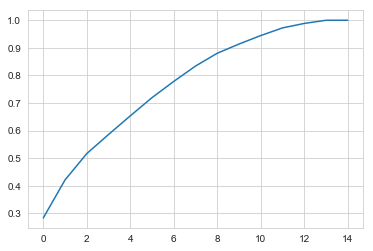

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# we can see that upto 10 pricniple component are explaining the variability of the data more than 92%
# instead if we come down to atleat 6 it will explain 78% of variability, where we are loosing a lot of information that will
# lead our models performance more biased. lets take 10 principle component and try to build the model.

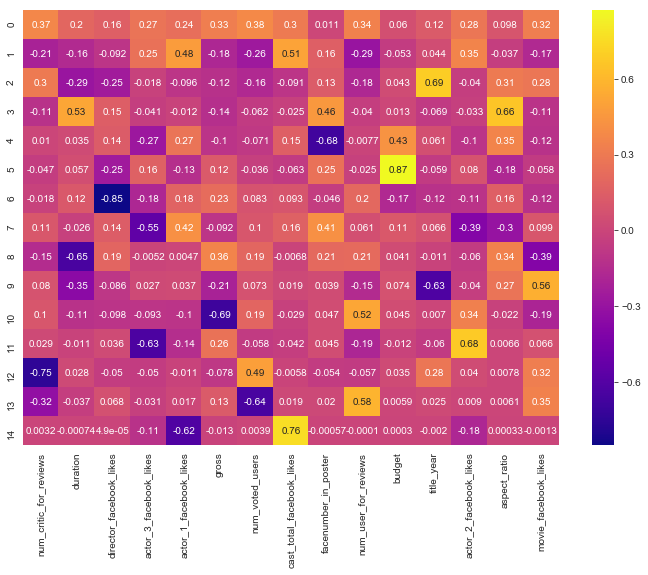

In [224]:
df_comp = pd.DataFrame(pca.components_, columns= moviedf.columns )
plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap='plasma', annot = True)
# We can see PC0 have all the feature's correlation less that 0.4 but it is still explaining 3-4 variables, PC1 is explaining,
# Actor_1_facebook_likes and cast_total_facebook_likes.PC2 while explains the title_Year,aspect_ratio and num_critics_review
# in this way till PC9 which is 10th pricipal component able explain more than 90% of variability. PC15 is explaining 
# remaining variability of cast_total_facebook_likes vy 76% but if we take till PC15 we are not reducing any dimesionality
# hence more than 90% is good enough in all the case but still we have more PCA but let's proceed with those components.

In [225]:
# lets make a new data set of 10 PCA components
cols = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']
pcaDF = pd.DataFrame(moviePCA, columns=cols)
movieDataPCA = pcaDF.drop(['PC11', 'PC12', 'PC13', 'PC14', 'PC15'], axis=1)

## Model Building using PCA

In [28]:
from sklearn.model_selection import train_test_split
X = movieDataPCA
y = target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Multiple Linear Regression using PCA

MAE 0.7003047100917226
RMSE 0.9046400446170848


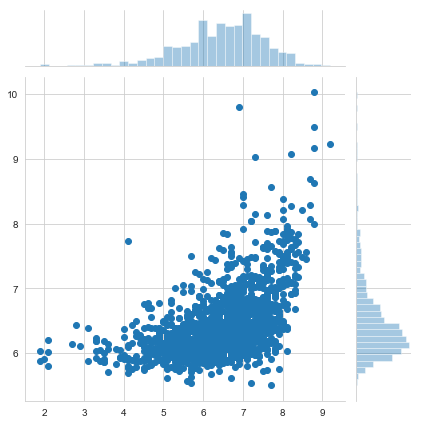

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
prediction_lm = lm.predict(x_test)

from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, prediction_lm))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, prediction_lm)))

sns.jointplot(y_test, prediction_lm) # Errors follow Guassian distribution but it is slightly off.

# Though residual has error of 9 % which means 91 % accuracy but the residual is not showing the normal distribution.
# it might not be the perfect model so lets look at the other models.

#### Tree Models using PCA data

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [93]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [37]:
# Random Forest Regressor
tune_RFG={'n_estimators':[100,120,150,200],'criterion':['mae','mse'],'min_samples_leaf':[10,15,20],'oob_score':['True','False']}
rfgModel = GridSearchCV(RandomForestRegressor(), param_grid=tune_RFG, verbose=2)
rfgModel.fit(x_train, y_train)
prediction_rfgModel = rfgModel.predict(x_test)

C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True 
[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   5.9s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s
C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   5.7s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   5.7s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   6.0s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   6.0s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   6.1s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   7.1s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   7.4s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   6.9s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   7.4s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   7.0s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   7.3s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   8.6s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   8.7s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   8.8s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   9.0s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   8.6s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   8.6s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True, total=  11.1s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True, total=  11.3s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=True, total=  11.9s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False, total=  11.7s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False, total=  11.3s
[CV] criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=10, n_estimators=200, oob_score=False, total=  11.9s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   5.6s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   5.6s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   5.4s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   5.3s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   5.4s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   5.4s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   6.7s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   6.9s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   6.9s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   7.1s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   6.5s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   6.5s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   8.7s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   8.6s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   8.5s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   8.2s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   8.5s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   8.2s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True, total=  10.9s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True, total=  11.3s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=True, total=  11.2s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False, total=  11.2s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False, total=  11.3s
[CV] criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=15, n_estimators=200, oob_score=False, total=  11.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   5.6s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   5.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   5.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   5.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   5.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   5.4s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   6.5s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   6.5s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   6.3s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   6.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   6.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   6.7s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   8.3s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   8.2s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   7.9s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   8.5s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   7.8s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   8.1s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True, total=  11.0s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True, total=  11.0s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=True, total=  12.3s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False, total=  12.7s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False, total=  12.7s
[CV] criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mae, min_samples_leaf=20, n_estimators=200, oob_score=False, total=  11.5s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   0.3s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   0.3s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=100, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=120, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   0.6s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   0.7s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=True, total=   0.7s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   0.7s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   0.6s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=150, oob_score=False, total=   0.6s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True, total=   0.8s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True, total=   0.8s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=True, total=   0.9s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False, total=   1.0s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False, total=   1.0s
[CV] criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=10, n_estimators=200, oob_score=False, total=   1.1s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=100, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=120, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   0.7s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   0.7s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=True, total=   0.6s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   0.6s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   0.7s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=150, oob_score=False, total=   0.7s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True, total=   0.9s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True, total=   0.9s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=True, total=   0.9s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False, total=   0.8s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False, total=   1.0s
[CV] criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=15, n_estimators=200, oob_score=False, total=   1.0s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   0.3s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=True, total=   0.3s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   0.3s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   0.3s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=100, oob_score=False, total=   0.3s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=True, total=   0.5s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=120, oob_score=False, total=   0.4s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   0.6s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   0.6s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=True, total=   0.6s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   0.5s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=150, oob_score=False, total=   0.6s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True, total=   0.8s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True, total=   0.8s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=True, total=   0.8s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False, total=   0.8s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False, total=   1.0s
[CV] criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False 


C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, min_samples_leaf=20, n_estimators=200, oob_score=False, total=   0.8s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 10.7min finished
C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [38]:
prediction_rfgModel = np.reshape(prediction_rfgModel, (-1,1))

In [94]:
# Bagging Regressor

brModel = BaggingRegressor(n_estimators=120, oob_score=True)
brModel.fit(x_train,y_train)
prediction_brModel = brModel.predict(x_test)
prediction_brModel = np.reshape(prediction_brModel, (-1,1))

In [95]:
# ADA boost Regressor

adaModel = AdaBoostRegressor(n_estimators=120, loss='exponential')
adaModel.fit(x_train, y_train)
prediction_adaModel = adaModel.predict(x_test)
prediction_adaModel = np.reshape(prediction_adaModel, (-1,1))

In [96]:
# Gradient Boosting Regression

gbrModel = GradientBoostingRegressor(n_estimators=120)
gbrModel.fit(x_train, y_train)
prediction_gbrModel = gbrModel.predict(x_test)
prediction_gbrModel = np.reshape(prediction_gbrModel, (-1,1))

In [97]:
print('RMSE_rfg', np.sqrt(metrics.mean_squared_error(y_test, prediction_rfgModel)))
print('RMSE_br', np.sqrt(metrics.mean_squared_error(y_test, prediction_brModel)))
print('RMSE_ada', np.sqrt(metrics.mean_squared_error(y_test, prediction_adaModel)))
print('RMSE_gbr', np.sqrt(metrics.mean_squared_error(y_test, prediction_gbrModel)))
print('\nLets choose bagging Regressor from the Tree model cause it has the lowest RMSE value')

RMSE_rfg 0.8273119995015451
RMSE_br 0.8178823951146557
RMSE_ada 1.1169952372752263
RMSE_gbr 0.8327701039159853

Lets choose bagging Regressor from the Tree model cause it has the lowest RMSE value


Text(0.5, 1.0, 'Gradient Boosting Error')

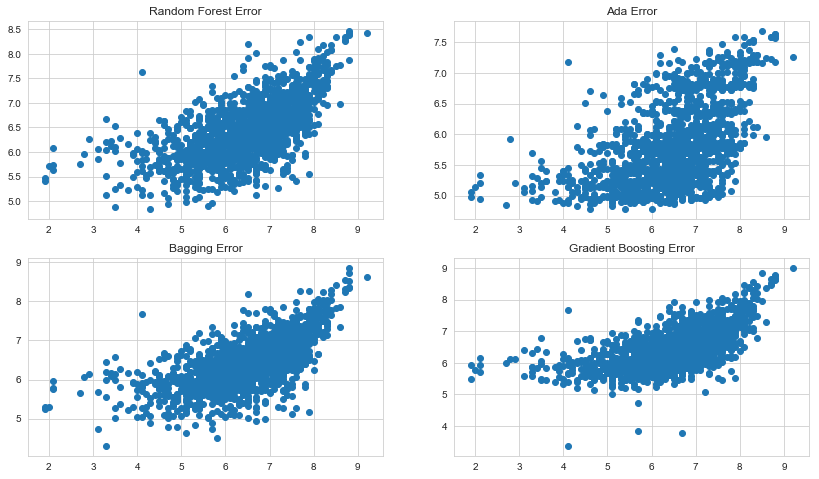

In [98]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax[0,0].scatter(y_test,prediction_rfgModel)
ax[0,0].set_title('Random Forest Error')
ax[0,1].scatter(y_test, prediction_adaModel)
ax[0,1].set_title('Ada Error')
ax[1,0].scatter(y_test,prediction_brModel)
ax[1,0].set_title('Bagging Error')
ax[1,1].scatter(y_test,prediction_gbrModel)
ax[1,1].set_title('Gradient Boosting Error')

# Error seems very low to Bagging , but residual error is more accurate for Gradient Boosting. Bagging might be too overfitting
# hence select GBR as the model using Trees

#### Support Vector Model using PCA Data

In [36]:
from sklearn.svm import SVR
tune_svr = {'C':[10,50,100,500],'gamma':[1,0.50,0.10],'epsilon':[0.1,0.2]}
svrModel = GridSearchCV(SVR(), param_grid=tune_svr, verbose=2)
svrModel.fit(x_train, y_train)
prediction_svrModel = svrModel.predict(x_test)
prediction_svrModel = np.reshape(prediction_svrModel, (-1,1))

C:\Users\prati\Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=10, epsilon=0.1, gamma=1 ......................................
[CV] ....................... C=10, epsilon=0.1, gamma=1, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=10, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=10, epsilon=0.1, gamma=1, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.1, gamma=0.5, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.1, gamma=0.5, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.1, gamma=0.5, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.1, gamma=0.1, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=1 ......................................
[CV] ....................... C=10, epsilon=0.2, gamma=1, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=10, epsilon=0.2, gamma=1, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=1 ......................................
[CV] ....................... C=10, epsilon=0.2, gamma=1, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.2, gamma=0.5, total=   0.2s
[CV] C=10, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.2, gamma=0.5, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.2, gamma=0.5, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=0.1 ....................................
[CV] ..................... C=10, epsilon=0.2, gamma=0.1, total=   0.0s
[CV] C=10, epsilon=0.2, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.2, gamma=0.1, total=   0.1s
[CV] C=10, epsilon=0.2, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, epsilon=0.2, gamma=0.1, total=   0.1s
[CV] C=50, epsilon=0.1, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.1, gamma=1, total=   0.3s
[CV] C=50, epsilon=0.1, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.1, gamma=1, total=   0.3s
[CV] C=50, epsilon=0.1, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.1, gamma=1, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.1, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.1, total=   0.4s
[CV] C=50, epsilon=0.1, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.1, gamma=0.1, total=   0.5s
[CV] C=50, epsilon=0.2, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.2, gamma=1, total=   0.3s
[CV] C=50, epsilon=0.2, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.2, gamma=1, total=   0.3s
[CV] C=50, epsilon=0.2, gamma=1 ......................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=50, epsilon=0.2, gamma=1, total=   0.3s
[CV] C=50, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.2, gamma=0.5 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.5, total=   0.4s
[CV] C=50, epsilon=0.2, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.1, total=   0.3s
[CV] C=50, epsilon=0.2, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.1, total=   0.2s
[CV] C=50, epsilon=0.2, gamma=0.1 ....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=50, epsilon=0.2, gamma=0.1, total=   0.2s
[CV] C=100, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.4s
[CV] C=100, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.4s
[CV] C=100, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.1, gamma=1, total=   0.4s
[CV] C=100, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.5, total=   0.7s
[CV] C=100, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.5, total=   0.7s
[CV] C=100, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.5, total=   0.7s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.6s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.6s
[CV] C=100, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.1, gamma=0.1, total=   0.6s
[CV] C=100, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.2, gamma=1, total=   0.3s
[CV] C=100, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.2, gamma=1, total=   0.4s
[CV] C=100, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, epsilon=0.2, gamma=1, total=   0.4s
[CV] C=100, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.5, total=   0.6s
[CV] C=100, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.5, total=   0.5s
[CV] C=100, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.5, total=   0.6s
[CV] C=100, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.1, total=   0.6s
[CV] C=100, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.1, total=   0.6s
[CV] C=100, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, epsilon=0.2, gamma=0.1, total=   0.6s
[CV] C=500, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.1, gamma=1, total=   0.8s
[CV] C=500, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.1, gamma=1, total=   0.8s
[CV] C=500, epsilon=0.1, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.1, gamma=1, total=   1.0s
[CV] C=500, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.5, total=   2.4s
[CV] C=500, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.5, total=   1.9s
[CV] C=500, epsilon=0.1, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.5, total=   1.8s
[CV] C=500, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.1, total=   3.3s
[CV] C=500, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.1, total=   3.1s
[CV] C=500, epsilon=0.1, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.1, gamma=0.1, total=   2.7s
[CV] C=500, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.2, gamma=1, total=   0.6s
[CV] C=500, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.2, gamma=1, total=   0.6s
[CV] C=500, epsilon=0.2, gamma=1 .....................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=500, epsilon=0.2, gamma=1, total=   0.6s
[CV] C=500, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.5, total=   1.9s
[CV] C=500, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.5, total=   2.0s
[CV] C=500, epsilon=0.2, gamma=0.5 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.5, total=   1.9s
[CV] C=500, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.1, total=   2.9s
[CV] C=500, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.1, total=   2.8s
[CV] C=500, epsilon=0.2, gamma=0.1 ...................................


C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=500, epsilon=0.2, gamma=0.1, total=   2.3s


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.0min finished
C:\Users\prati\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE_svr 0.8186101515952475


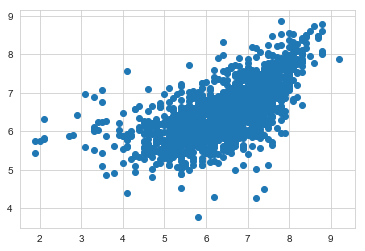

In [99]:
svrModel.best_params_
print('RMSE_svr', np.sqrt(metrics.mean_squared_error(y_test, prediction_svrModel)))
plt.scatter(y_test, prediction_svrModel)
# it performed liitle better than other but it seems SVR overfitted the data

#### Train and test score

In [103]:
print('Train_LM: '+str(lm.score(x_train, y_train))+ '\tTest_LM: '+str(lm.score(x_test, y_test)))
print('Train_RFG: '+str(rfgModel.score(x_train, y_train))+ '\tTest_RFG: '+str(rfgModel.score(x_test, y_test)))
print('Train_BR: '+str(brModel.score(x_train, y_train))+ '\tTest_BR: '+str(brModel.score(x_test, y_test)))
print('Train_ADA: '+str(adaModel.score(x_train, y_train))+ '\tTest_ADA: '+str(adaModel.score(x_test, y_test)))
print('Train_GBR: '+str(gbrModel.score(x_train, y_train))+ '\tTest_GBR: '+str(gbrModel.score(x_test, y_test)))
print('Train_SVR: '+str(svrModel.score(x_train, y_train))+ '\tTest_SVR: '+str(svrModel.score(x_test, y_test)))

# Looking at the scores our models are underfit and some are overfit. Some how SVR improves the model but still the score is
# in vast difference. All our models are not performing well. Only Linear Model is good interms of score not overfit and
# underfit, but it doesn't have good scoreIt may be we dont have enough data or may be we still have large numbers of 
# features. Let's use Lasso and Ridge instead to see if the models could improve if we apply some cost factor.

Train_LM: 0.2993573835617679	Test_LM: 0.25938296118057846
Train_RFG: 0.627758817028508	Test_RFG: 0.380586409712078
Train_BR: 0.91581696762337	Test_BR: 0.39462594641566884
Train_ADA: -0.005524987006110704	Test_ADA: -0.129132025758121
Train_GBR: 0.5996595681542953	Test_GBR: 0.3723864165531445
Train_SVR: 0.5745165434432382	Test_SVR: 0.3935481364471367


# 5. Regularization Models in Original Data without PCA

### Lasso and Ridge Regression One Original Dataset without PCA

In [127]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Our original data ser without normalizing and pca are MOVIEDF=inputs, and TARGET-outputs

In [245]:
# Split data
X = moviedf
y = target
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.4, random_state=101)

In [246]:
# Applying linear Model
lm = LinearRegression()
lm.fit(X_train, y_train)
p_lm = lm.predict(X_test)
res_lm = (y_test - p_lm)

# Applying Ridge Regressor
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
p_rr = rr.predict(X_test)
res_rr = (y_test - p_rr)

rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
p_rr100 = rr100.predict(X_test)
res_rr100 = (y_test - p_rr100)

rr1000 = Ridge(alpha=1000)
rr1000.fit(X_train, y_train)
p_rr1000 = rr1000.predict(X_test)
res_rr1000 = (y_test - p_rr1000)

# Applying Lasso (It will also help us for feature identification)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
p_lasso = lasso.predict(X_test)
p_lasso = np.reshape(p_lasso, (-1,1))
res_lasso = (y_test - p_lasso)
coeff_used = np.sum(lasso.coef_!=0)

lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
p_lasso01 = lasso01.predict(X_train)
p_lasso01 = np.reshape(p_lasso01, (-1,1))
coeff_used001 = np.sum(lasso001.coef_!=0)

lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
p_lasso0001 = lasso0001.predict(X_train)
p_lasso0001 = np.reshape(p_lasso0001, (-1,1))
coeff_used0001 = np.sum(lasso0001.coef_!=0)

In [247]:
# Training and Test Score
print('Train_lm: '+str(lm.score(X_train, y_train))+ '\tTest_lm: '+str(lm.score(X_test, y_test)))
print('Train_rr: '+str(rr.score(X_train, y_train))+ '\tTest_rr: '+str(rr.score(X_test, y_test)))
print('Train_rr100: '+str(rr100.score(X_train, y_train))+ '\tTest_rr100: '+str(rr100.score(X_test, y_test)))
print('Train_rr1000: '+str(rr1000.score(X_train, y_train))+ '\tTest_rr1000: '+str(rr1000.score(X_test, y_test)))
print('Train_lasso: '+str(lasso.score(X_train, y_train))+ '\tTest_lasso: '+str(lasso.score(X_test, y_test)))
print('Train_lasso01: '+str(lasso01.score(X_train, y_train))+ '\tTest_lasso01: '+str(lasso01.score(X_test, y_test)))
print('Train_lasso0001: '+str(lasso0001.score(X_train, y_train))+ '\tTest_lasso0001: '+str(lasso0001.score(X_test, y_test)))
print('\n')
print ("number of features used: ", coeff_used)
print ("number of features used: for alpha =0.01:", coeff_used001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

Train_lm: 0.3809962751823177	Test_lm: 0.3355593947988501
Train_rr: 0.3809962751822027	Test_rr: 0.33555938027579457
Train_rr100: 0.38098934334006584	Test_rr100: 0.3354463154468481
Train_rr1000: 0.38090159802254997	Test_rr1000: 0.33519992764861783
Train_lasso: 0.3648153190383241	Test_lasso: 0.32425815006060127
Train_lasso01: 0.3808432584312248	Test_lasso01: 0.3350231976408493
Train_lasso0001: 0.3809962131791963	Test_lasso0001: 0.33554883624788623


number of features used:  13
number of features used: for alpha =0.01: 10
number of features used: for alpha =0.0001: 10


In [248]:
# From the application or ridge and lasso we can see that we dont havt model complexity when we built with PCA.But there is
# not any significant improvement too.Lets see the residual plots and error rate 'RMSE'
print('RMSE_lm: ', np.sqrt(metrics.mean_squared_error(y_test, p_lm)))
print('RMSE_rr:', np.sqrt(metrics.mean_squared_error(y_test, p_rr)))
print('RMSE_rr100: ', np.sqrt(metrics.mean_squared_error(y_test, p_rr100)))
print('RMSE_rr1000: ', np.sqrt(metrics.mean_squared_error(y_test, p_rr1000)))
print('RMSE_lasso: ', np.sqrt(metrics.mean_squared_error(y_test, p_lasso)))

RMSE_lm:  0.856854419605697
RMSE_rr: 0.8568544289700737
RMSE_rr100:  0.8569273293734411
RMSE_rr1000:  0.8570861704696492
RMSE_lasso:  0.8641106679354162


Text(0.5, 1.0, 'Lasso')

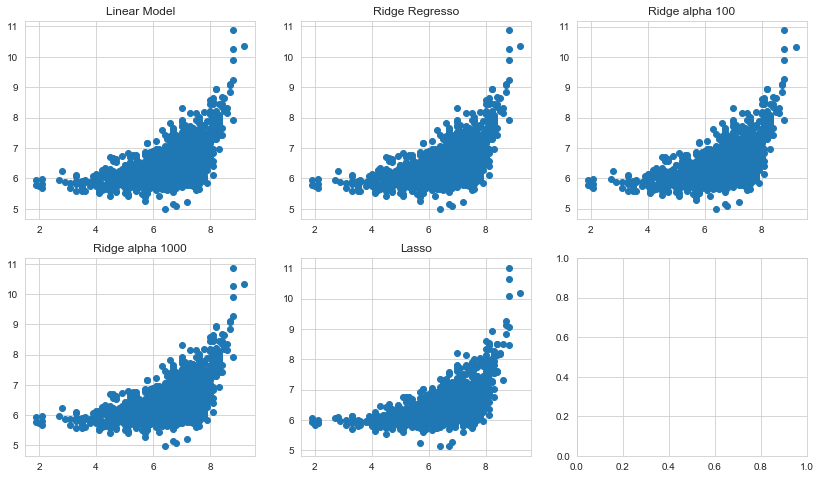

In [249]:
# Actual VS Prediction
fig,ax = plt.subplots(2,3,figsize=(14,8))
ax[0,0].scatter(y_test,p_lm)
ax[0,0].set_title('Linear Model')
ax[0,1].scatter(y_test, p_rr)
ax[0,1].set_title('Ridge Regresso')
ax[0,2].scatter(y_test,p_rr100)
ax[0,2].set_title('Ridge alpha 100')
ax[1,0].scatter(y_test,p_rr1000)
ax[1,0].set_title('Ridge alpha 1000')
ax[1,1].scatter(y_test,p_lasso)
ax[1,1].set_title('Lasso')

###### As we can see that residual vs predicted or actual VS predicted graphs of all the models not straight or linear. They are curved so we can remove outliers or log transform the input. but there are so many 0's and low number we will get INF while doing log. Therefore removing all the outliers will be the best approach in this case while we will loose a lot of information.

# 6. Models: Without Outliers

In [490]:
# let's include genre into dataframe , remove outliers, split and then build some models.
cat_Columns = ['color', 'director_name','actor_2_name', 'actor_1_name','genres','movie_title','actor_3_name',
                      'plot_keywords','movie_imdb_link','language', 'country','content_rating']
df = movieclean.drop(cat_Columns, axis=1).reset_index(drop=True)

In [491]:
# apply IQR to remove all the Outliers. We can also use z-score

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape # we have removed a lots of data now we have 2110 rows

(2110, 16)

In [493]:
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']

In [594]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X, y, test_size=0.40, random_state=1001)

In [619]:
# Build the Lasso Regression
las = Lasso(alpha=0.001, normalize= False)
las.fit(Xo_train, yo_train)
print(las.score(Xo_train, yo_train))
print(las.score(Xo_test, yo_test))
lasp = las.predict(Xo_test)

0.33190767148877365
0.3306120586226317


In [620]:
# Build the Bagging
bg = BaggingRegressor(n_estimators=70, bootstrap_features=True, max_samples=0.5,max_features=1.0, random_state=None)
bg.fit(Xo_train, yo_train)
print(bg.score(Xo_train, yo_train))
print(bg.score(Xo_test, yo_test))
bgp = bg.predict(Xo_test)

0.7654763583543498
0.3932356078959022


In [621]:
# Applying linear Model
lm = LinearRegression(normalize= True)
lm.fit(Xo_train, yo_train)
print(lm.score(Xo_train, yo_train))
print(lm.score(Xo_test, yo_test))
lmp = lm.predict(Xo_test)

0.3319255132763249
0.3304183206894574


In [622]:
# Applying Ridge Regressor
rr = Ridge(alpha=0.000001, normalize=True)
rr.fit(Xo_train, yo_train)
print(rr.score(Xo_train, yo_train))
print(rr.score(Xo_test, yo_test))
rrp = rr.predict(Xo_test)

0.3319255113887952
0.33042405476010267


In [623]:
# Build Randomforest
rf = RandomForestRegressor(n_estimators=150,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=10001,
    verbose=0,
    warm_start=False,)
rf.fit(Xo_train, yo_train)
print(rf.score(Xo_train, yo_train))
print(rf.score(Xo_test, yo_test))
rfp = rf.predict(Xo_test)

0.6396839408348772
0.4420118926307114


In [624]:
print('RMSE_bg', np.sqrt(metrics.mean_squared_error(yo_test, bgp)))
print('RMSE_lm', np.sqrt(metrics.mean_squared_error(yo_test, lmp)))
print('RMSE_rf', np.sqrt(metrics.mean_squared_error(yo_test, rfp)))
print('RMSE_rr', np.sqrt(metrics.mean_squared_error(yo_test, rrp)))
print('RMSE_las', np.sqrt(metrics.mean_squared_error(yo_test, lasp)))

RMSE_bg 0.7834366091109173
RMSE_lm 0.8229919736821568
RMSE_rf 0.7512877195481461
RMSE_rr 0.8229884497623972
RMSE_las 0.822872902100524


#### We can see that trying all different models, PCA, tuning models, outlier handling, did not gave us the good models. But if we choose according to RMSE value then i would prefer Random Forest regressor or bagging regressor because it has minimum value that other models although the model is over fitted but still we can tune it to make little better than other models. Lasso could perform well in this case although it did not overfitted, but it has greater RMSE and low score.